In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2011-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864277
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078651
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131255
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214124
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205873


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864277
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078651
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131255
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214124
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205873


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)


In [6]:
df.head()

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0


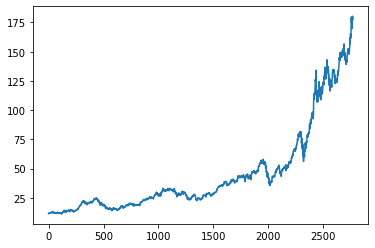

In [7]:
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0
...,...,...,...,...,...
2765,180.419998,177.070007,177.089996,180.330002,74919600.0
2766,181.330002,178.529999,180.160004,179.289993,79144300.0
2767,180.630005,178.139999,179.330002,179.380005,62348900.0
2768,180.570007,178.089996,179.470001,178.199997,59773000.0


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2765    153.3444
2766    153.6667
2767    153.9991
2768    154.3202
2769    154.6399
Name: Close, Length: 2770, dtype: float64

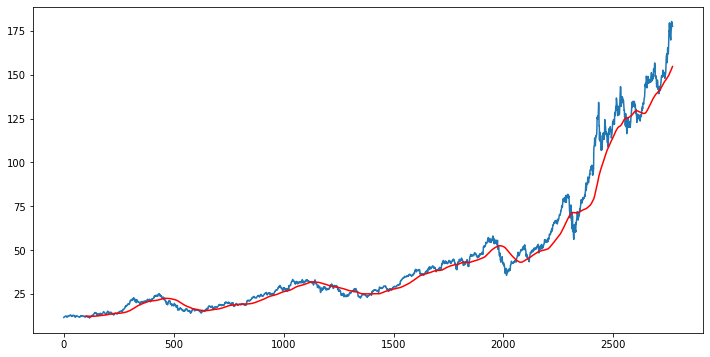

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2765    142.85570
2766    143.13220
2767    143.40125
2768    143.66845
2769    143.95365
Name: Close, Length: 2770, dtype: float64

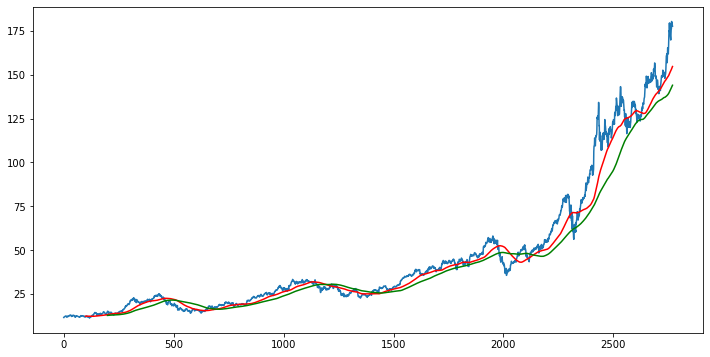

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

In [ ]:
#Split data into Train & Test

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

In [ ]:
data_training.head()

In [ ]:
data_testing.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

In [ ]:
data_training_array.shape

In [ ]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

In [ ]:
#ML model

from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
              input_shape = (x_train.shape[1], 1))) #as working with only 1 column so only 1

model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences=True)) 

model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences=True)) 

model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120, activation = 'relu' )) 

model.add(Dropout(0.5))

model.add(Dense(units=1))


In [ ]:
#model.build(input_shape)
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df=past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape


In [ ]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [ ]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
#Predicting

y_predicted=model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.00690691
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()